# Observation Planning

Questions to ask when planning a photometric observing session ("run"):

1. [__Where is my target?__](#Where-is-my-target?)
2. [__When can I observe my target?__](#When-can-I-observe-my-target?)
    * [Questions: Non-computer-based answers](#Questions-to-Answer)
    * [Using Astroplan](#Answer-questions-with-astroplan)
    * [Time Zones](#Time-Zones)
    * [Airmass Plots](#Airmass-Plots)
3. [__How do I know when I've found my target (make a finder chart)?__](#How-do-I-know-when-I've-found-my-target?-Make-a-finder-chart)
    * [Planning for Clouds with a sky chart](#Planning-for-Clouds)
    * [Exercise: Do it yourself](#EXERCISE)
3. How long do I need to observe? [not today]
4. How will I calibrate my data? [not today]

## Where is my target? 

[Index](#Observation-Planning)

Let's pick a few exciting targets to look at.  These are gigantic evolved stars, Luminous Blue Variables and Yellow Hypergiants and Supergiants:

1. P Cygni
2. Rho Cassiopeia
3. HD 168607
4. Polaris

To find where these sources are on the sky, we can query a few databases, including the SESAME name resolver service (http://cds.u-strasbg.fr/cgi-bin/Sesame) and the SIMBAD service.  We can do this using `astropy`, the main library for astronomical analysis.


In [1]:
from astropy import coordinates, units

In [2]:
# this uses SESAME
pcyg_coord = coordinates.SkyCoord.from_name('P Cygni')
pcyg_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (304.44667535, 38.03293131)>

We can display this in other ways too:

In [3]:
pcyg_coord.to_string('hmsdms')

'20h17m47.202084s +38d01m58.552716s'

The SIMBAD service gives us a little additional information:

In [4]:
from astroquery.simbad import Simbad

In [5]:
pcyg_simbad = Simbad.query_object('P Cygni')
pcyg_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
* P Cyg,20 17 47.2020,+38 01 58.552,11,11,0.120,0.130,90,A,O,2007A&A...474..653V,1


We'll just use SESAME for the others, though.  Fill in the SESAME approach for `rhocas` (Rho Cassiopeia), `hd168607` (HD 168607), and `polaris` ("Polaris"):

(`coordinates.SkyCoord.from_name` uses SESAME to obtain the object's coordinates)

In [6]:
# replace this cell with your answer
# the variable names should be those used in the next cell

rhocas_coord = coordinates.SkyCoord.from_name('rho Cas')
print(rhocas_coord)

hd168607_coord = coordinates.SkyCoord.from_name('HD 168607')
print(hd168607_coord)

polaris_coord = coordinates.SkyCoord.from_name('Polaris')
print(polaris_coord)

### FOR LAB 4
vega_coord = coordinates.SkyCoord.from_name('Vega')
print(vega_coord)

m13_coord = coordinates.SkyCoord.from_name('M13')
print(m13_coord)

m57_coord = coordinates.SkyCoord.from_name('M57')
print(m57_coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (358.59597498, 57.4993797)>
<SkyCoord (ICRS): (ra, dec) in deg
    (275.31202306, -16.37548903)>
<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>
<SkyCoord (ICRS): (ra, dec) in deg
    (279.23473479, 38.78368896)>
<SkyCoord (ICRS): (ra, dec) in deg
    (250.423475, 36.46131944)>
<SkyCoord (ICRS): (ra, dec) in deg
    (283.39623732, 33.02913421)>


In [7]:
print(pcyg_coord.to_string('hmsdms'))
print(rhocas_coord.to_string('hmsdms'))
print(hd168607_coord.to_string('hmsdms'))
print(polaris_coord.to_string('hmsdms'))

## LAB 4
print(vega_coord.to_string('hmsdms'))
print(m13_coord.to_string('hmsdms'))
print(m57_coord.to_string('hmsdms'))

20h17m47.202084s +38d01m58.552716s
23h54m23.0339952s +57d29m57.76692s
18h21m14.8855344s -16d22m31.760508s
02h31m49.0945608s +89d15m50.792292s
18h36m56.3363496s +38d47m01.280256s
16h41m41.634s +36d27m40.749984s
18h53m35.0969568s +33d01m44.883156s


## When can I observe my target?

[Index](#Observation-Planning)

Next, knowing where these are on the sky, we can ask what times of year they are up at night.

We first have to define where _we_ are by setting the observatory location.

In [8]:
from astroplan import Observer
from astropy import units as u # shortcut

In [9]:
# sometimes we have to update the database; if that's necessary, a message will pop up telling us
from astropy.utils import iers
iers.conf.IERS_A_URL = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
iers.conf.IERS_A_URL_MIRROR = 'https://datacenter.iers.org/data/9/finals2000A.all'
from astroplan import download_IERS_A
download_IERS_A()

In [10]:
CTO = Observer(location=coordinates.EarthLocation(lat=29.643018, lon=-82.349004*u.deg, height=31*u.m),
               timezone='US/Eastern',
               name='University of Florida Campus Teaching Observatory',
              )
CTO

<Observer: name='University of Florida Campus Teaching Observatory',
    location (lon, lat, el)=(-82.34900399999998 deg, 29.643018 deg, 30.99999999950558 m),
    timezone=<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>>

Before we go on, we can use some information we already have in hand to determine approximately when we can observe these objects.  It is important to do this sort of qualitative 'sanity check' to ensure that the numbers coming from the computer are reasonable.

The March equinox defines the zero-point of the Right Ascension coordinate, which means that 12h RA goes overhead at midnight (0h RA goes overhead at noon).

# Questions to Answer

[Index](#Observation-Planning)

There are 24 hours in a day and 12 months in a year.  By how many hours does the sky rotate each month?

A: Stars rise 4 min earlier each day. 4min(30 days) = 120 min = 2 h

How many degrees?

A: Over the course of the month stars shift ~ 30 degrees

Given the above information, answer the following questions:

1. What is the Right Ascension of the Sun in the March (vernal) equinox?

A: 0 h

2. What is the RA of the Sun at the September (autumnal) equinox?

A: 12 h

3. During what season or month do our targets reach zenith at midnight? (one answer per target)

 a star is at zenith when dec = latitude 
 Sky moves 2 h per month 
 stars shift 30 degrees per month
 
A:
* P Cyg: 

current: 304.44667535, 38.03293131

38 - 29.6 = 8.4 degrees late August early Sept 

* Rho Cas: 

current: 358.59597498, 57.4993797

57.5 - 29.6 = 27.9 so almost 30, Early August 

* HD 168607: 

current:(275.31202306, -16.37548903)

29.6 + 16.37 = 46 late october

* Polaris: 

current: (37.95456067, 89.26410897)

Polaris never rises or sets so it will never be at our zenith

Having done these checks, we can proceed to get more precise answers.

We create `target` objects to observe at different times.

## Answer questions with astroplan

[Index](#Observation-Planning)

In [11]:
from astroplan import FixedTarget

In [57]:
pcyg_target = FixedTarget(pcyg_coord, name="P Cygni")
rhocas_target = FixedTarget(rhocas_coord, name="Rho Cas")
hd168607_target = FixedTarget(hd168607_coord, name="HD 168607")
polaris_target = FixedTarget(polaris_coord, name="Polaris")
print(pcyg_target, rhocas_target, hd168607_target, polaris_target)

## LAB 4
vega_target =  FixedTarget(vega_coord, name="Vega")
m13_target =  FixedTarget(m13_coord, name="M 13")
m57_target =  FixedTarget(m57_coord, name="M 57")
print(vega_target, m13_target, m57_target)

<FixedTarget "P Cygni" at SkyCoord (ICRS): (ra, dec) in deg (304.44667535, 38.03293131)> <FixedTarget "Rho Cas" at SkyCoord (ICRS): (ra, dec) in deg (358.59597498, 57.4993797)> <FixedTarget "HD 168607" at SkyCoord (ICRS): (ra, dec) in deg (275.31202306, -16.37548903)> <FixedTarget "Polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>
<FixedTarget "Vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)> <FixedTarget "M 13" at SkyCoord (ICRS): (ra, dec) in deg (250.423475, 36.46131944)> <FixedTarget "M 57" at SkyCoord (ICRS): (ra, dec) in deg (283.39623732, 33.02913421)>


To determine the observability of an object, we ask whether the object is "up" (in the sky, as opposed to underfoot), and whether it is night time.

What time are you working on this notebook?  Is it night?  Are the target sources "up"?  (answer these before filling out the code)

It is 4:30 pm, the stars are above the horizon

<your answer here>

Since the answers to all of our questions depend on both the time of day and the time of year, we need to define our time.

In [58]:
from astropy.time import Time

In [59]:
now = Time.now()
now

<Time object: scale='utc' format='datetime' value=2021-10-18 21:11:57.815744>

Are any of these sources "up"?  Astroplan will tell us:

In [60]:
CTO.target_is_up(now, [pcyg_target, rhocas_target, hd168607_target, polaris_target])

array([ True,  True,  True,  True])

In [61]:
## LAB 4
CTO.target_is_up(now, [vega_target, m13_target, m57_target])

array([ True,  True,  True])

At least some are "up" at the time of writing.

OK, but is it night?

In [62]:
CTO.is_night(now)

False

For planning purposes, we care more about what the future holds and how we're going to schedule our time, so we want to know when sunrise and sunset are.  We use `now` to tell the software that we care about sunrise and sunset _today_; we can put in future days to find out how sunrise/sunset times change.

In [63]:
CTO.sun_set_time(now), CTO.sun_rise_time(now)

(<Time object: scale='utc' format='jd' value=2459506.4524025135>,
 <Time object: scale='utc' format='jd' value=2459505.9840737996>)

These aren't formatted in a very familiar way, so we can use a standard format - e.g., ISO, the International Standards Organization format - to show them more nicely:

In [64]:
CTO.sun_set_time(now).iso, CTO.sun_rise_time(now).iso

('2021-10-18 22:51:27.577', '2021-10-18 11:37:03.976')

Those times look a bit funny because they're in UTC, Universal Coordinated Time.

### Time Zones

[Index](#Observation-Planning)

Time zones are tricky, so we rely on libraries to help us with them.

In [65]:
now.to_datetime(timezone=CTO.timezone).isoformat()

'2021-10-18T17:11:57.815744-04:00'

That's a pretty verbose way to ask for and display this, so we can define a shortcut to get the time of day in the Eastern time zone:

In [66]:
def eastern(time):
    est = time.to_datetime(timezone=CTO.timezone)
    
    return est.strftime('%H:%M:%S')

In [67]:
(eastern(CTO.sun_set_time(now)), eastern(CTO.sun_rise_time(now)))

('18:51:27', '07:37:03')

Now you can see that sunset is around 7:30 PM and sunrise is around 7:00 AM.  Note that we have sunset first, sunrise second, because we care about the interval between the sun going down and coming back up again, not the daytime.

We need to know the sun's rise and set time to avoid it, but we also can ask when our sources rise and set.

In [68]:
(eastern(CTO.target_rise_time(time=now, target=pcyg_target)),
 eastern(CTO.target_set_time(time=now, target=pcyg_target)))

('12:12:28', '03:41:59')

In [69]:
(eastern(CTO.target_rise_time(time=now, target=rhocas_target)),
 eastern(CTO.target_set_time(time=now, target=rhocas_target)))

('13:19:54', '09:51:13')

In [70]:
(eastern(CTO.target_rise_time(time=now, target=hd168607_target)),
 eastern(CTO.target_set_time(time=now, target=hd168607_target)))

('12:40:48', '23:22:05')

In [71]:
### Note: this will fail!  "Comment it out" and move on
((CTO.target_rise_time(time=now, target=polaris_target)),
 (CTO.target_set_time(time=now, target=polaris_target)))

C:\ProgramData\Anaconda3\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


(<Time object: scale='utc' format='jd' value=nan>,
 <Time object: scale='utc' format='jd' value=nan>)

## for lab 4

In [72]:
((CTO.target_rise_time(time=now, target=vega_target)),
 (CTO.target_set_time(time=now, target=vega_target)))

(<Time object: scale='utc' format='jd' value=2459506.1033993037>,
 <Time object: scale='utc' format='jd' value=2459506.752951376>)

In [73]:
((CTO.target_rise_time(time=now, target=m13_target)),
 (CTO.target_set_time(time=now, target=m13_target)))

(<Time object: scale='utc' format='jd' value=2459506.0302768773>,
 <Time object: scale='utc' format='jd' value=2459506.666505024>)

In [74]:
((CTO.target_rise_time(time=now, target=m57_target)),
 (CTO.target_set_time(time=now, target=m57_target)))

(<Time object: scale='utc' format='jd' value=2459506.1302073076>,
 <Time object: scale='utc' format='jd' value=2459506.7493216493>)

What's going on with that last one?  Since Polaris is the North Star, it is always observable from any northern observatory.  It has no rise and set time!

## Airmass Plots

[Index](#Observation-Planning)


We can visualize the "up time" for the targets using an _airmass plot_, which plots the airmass versus time of night.

[Airmass](https://en.wikipedia.org/wiki/Air_mass_(astronomy)) is the path length of air through which we're observing, and it is usually approximated as secant(zenith angle) and measured relative to zenith.


1 airmass is straight up, and is the minimum amount of atmosphere through which you can observe.

Generally, it is best to observe at airmass < 2 when possible.  Airmass up to ~3 can be useful.  Beyond that, serious complications tend to arise.

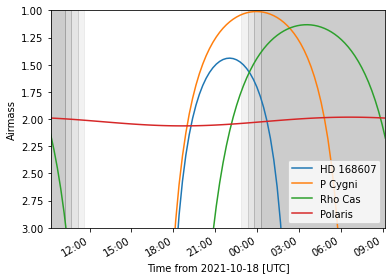

In [75]:
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 

plot_airmass([hd168607_target, pcyg_target, rhocas_target, polaris_target],
             observer=CTO,
             time=now,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

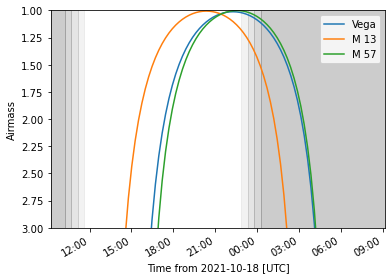

In [76]:
## FOR LAB 4

from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 

plot_airmass([vega_target, m13_target, m57_target],
             observer=CTO,
             time=now,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

Note that the X-axis is in Universal Coordinated Time (UTC).  If you want the plots in local time, you can request that the local timezone be used (but only for certain versions of astroplan):

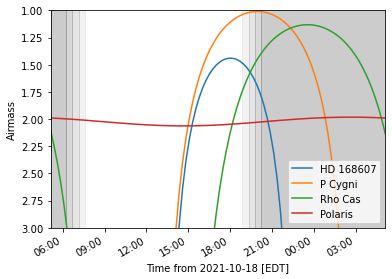

In [32]:
# if this fails, comment it out and continue
plot_airmass([hd168607_target, pcyg_target, rhocas_target, polaris_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

Answer some questions:

Which sources are up at night?  For how long is each source observable at airmass $\lesssim2$?  (Polaris is close enough to 2 to consider it observable)

All stars are up for a period of time. 
HD is observavle <~ 2 airmass from a little after 17:00 to 00:00, so around 7 hours
P Cygni is observable from a around 17:00 to about 5:00, so around 12 hours
Rho Cas is observable from around 19:30 to 9:00, so around 14 hours and 30 minutes

Whether we can actually see these objets during their observable periods depends on if it is night or not.

## How do I know when I've found my target? Make a finder chart

[Index](#Observation-Planning)

We need to know how to tell we're 'on target' when we've pointed our telescope at the right part of the sky.  With binoculars and other very wide field-of-view instruments, we can use known asterisms or constellations to navigate by, but with narrow field-of-view professional telescopes, we have to use fainter stars to aid our pointing.

We can obtain finder charts from the many public astronomical archives, like the Digitized Sky Survey, which carefully logged the whole sky in visible light images.

`astroplan` provides a means to obtain these images and plot them.  It uses `astroquery`, another library, to query the `SkyView` image cutout service.

In [33]:
from astroplan.plots import plot_finder_image

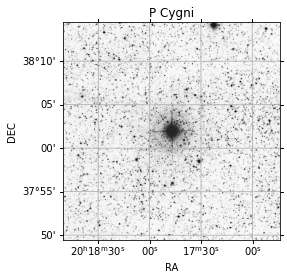

In [34]:
ax, hdu = plot_finder_image(pcyg_target, survey='DSS', fov_radius=25*u.arcmin)

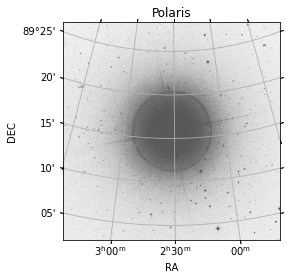

In [35]:
ax, hdu = plot_finder_image(polaris_target, survey='DSS', fov_radius=25*u.arcmin)

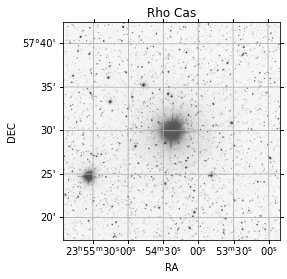

In [36]:
ax, hdu = plot_finder_image(rhocas_target, survey='DSS', fov_radius=25*u.arcmin)

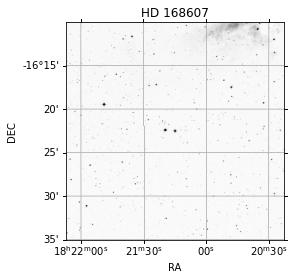

In [37]:
ax, hdu = plot_finder_image(hd168607_target, survey='DSS', fov_radius=25*u.arcmin)

## FOR LAB 4

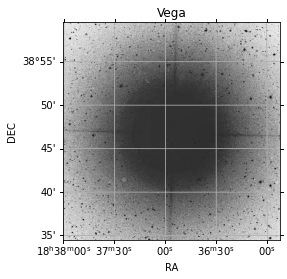

In [77]:
ax, hdu = plot_finder_image(vega_target, survey='DSS', fov_radius=25*u.arcmin)

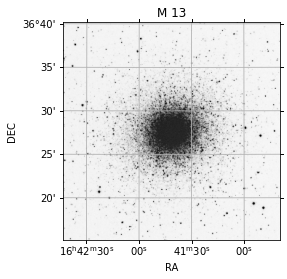

In [79]:
ax, hdu = plot_finder_image(m13_target, survey='DSS', fov_radius=25*u.arcmin)

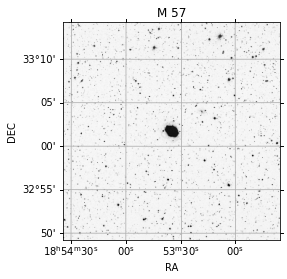

In [80]:
ax, hdu = plot_finder_image(m57_target, survey='DSS', fov_radius=25*u.arcmin)

<PolarAxesSubplot:>

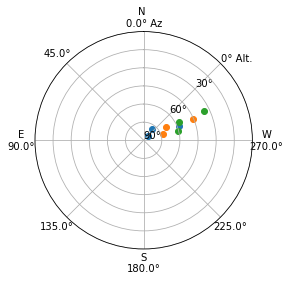

In [81]:
## FOR LAB 4
targets4 = [vega_target, m13_target, m57_target]
plot_sky(target=targets4, observer=CTO, time=sunset)
plot_sky(target=targets4, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets4, observer=CTO, time=twohours_after_sunset)

You might notice these images come out a little smaller than you would like.  You can control the figure size using matplotlib commands:

In [38]:
import matplotlib.pyplot as pl

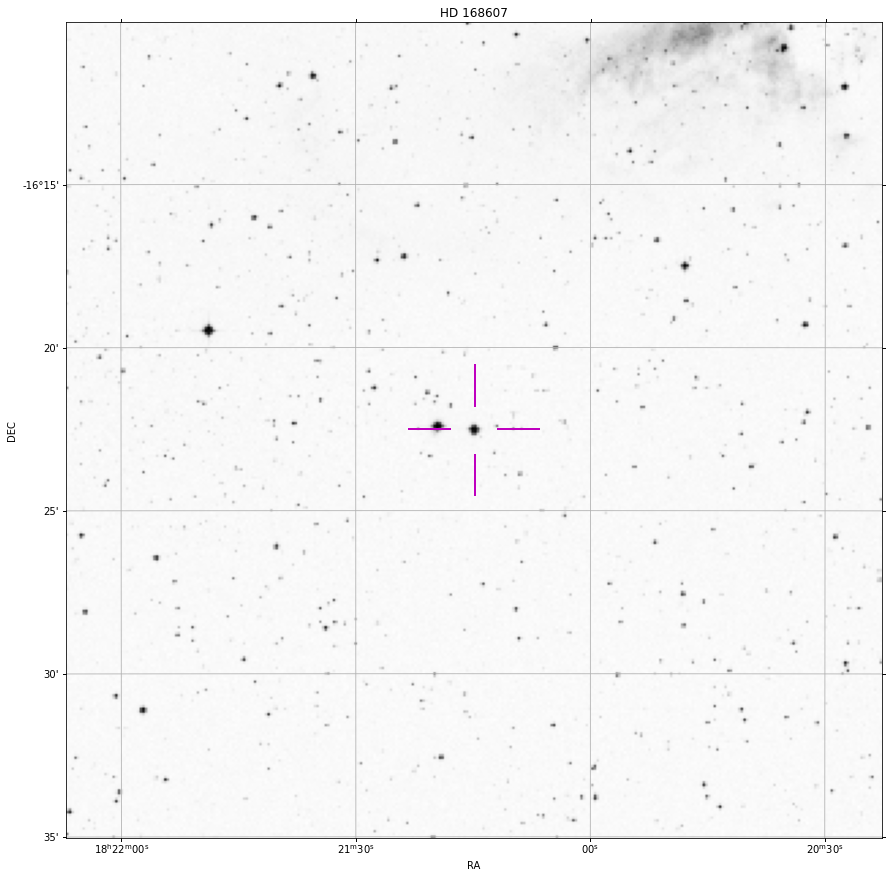

In [39]:
# specify the figure size in inches
pl.figure(figsize=(15, 15))
# a "reticle" is a set of crosshairs highlighting the target source
ax, hdu = plot_finder_image(hd168607_target, survey='DSS', fov_radius=25*u.arcmin, reticle=True)

## Planning for Clouds

[Index](#Observation-Planning)

What if the night is cloudy?  For professional observations, we will often write off cloudy nights as a lost cause, but for this class, sometimes we need to find the holes in the clouds and observe whatever's there! 

We can enable this by making sky charts.

In [40]:
from astroplan.plots import plot_sky

In [41]:
# first, let's find out where the objects are at sunset
sunset = CTO.sun_set_time(now)
# then, let's look 1 hour after sunset
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

<PolarAxesSubplot:>

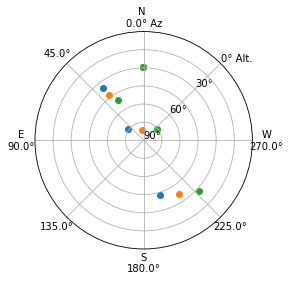

In [42]:
targets = [hd168607_target, pcyg_target, rhocas_target, polaris_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

In the star chart, the colors represent different times.  One of the points only shows the final color (maybe you can see some others behind it).  Why isn't it moving?

A: This star isn't moving because it generlly doesn't move trhoughout the night and is fixed on the night sky on the North Celestial Pole. (Polaris)

# EXERCISE

[Index](#Observation-Planning)

Create an altitude plot (showing the 'up time'), a sky chart, and a finder chart for each of the following sources:
1. M27
2. NGC 869
3. Gamma Andromedae

In [43]:
## creating coordinates and targets ##

m27_coord = coordinates.SkyCoord.from_name('M27')
ngc_coord = coordinates.SkyCoord.from_name('NGC 869')
andro_coord = coordinates.SkyCoord.from_name('Gamma Andromedae')

m27_target = FixedTarget(m27_coord, name="M27")
ngc_target = FixedTarget(ngc_coord, name="NGC 869")
andro_target = FixedTarget(andro_coord, name="Gamma Andromedae")

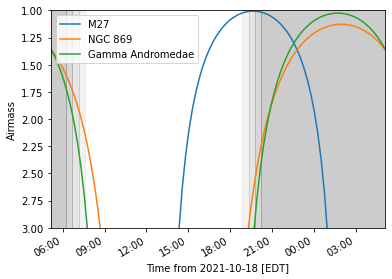

In [44]:
# airmass/altitude plot
plot_airmass([m27_target, ngc_target, andro_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

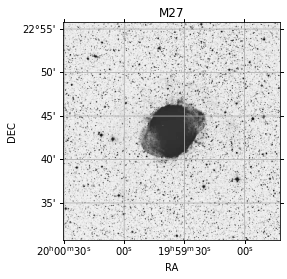

In [45]:
## sky chart M27 ##
ax, hdu = plot_finder_image(m27_target, survey='DSS', fov_radius=25*u.arcmin)

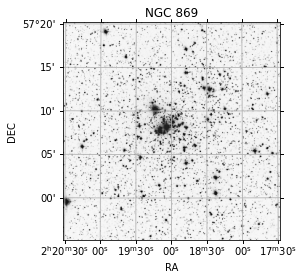

In [46]:
## sky chart NGC 869 ##
ax, hdu = plot_finder_image(ngc_target, survey='DSS', fov_radius=25*u.arcmin)

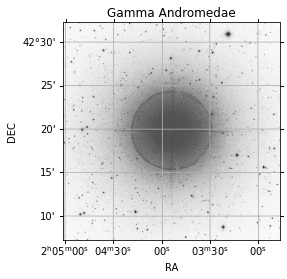

In [47]:
## sky chart Gamma Andromedae ##
ax, hdu = plot_finder_image(andro_target, survey='DSS', fov_radius=25*u.arcmin)

<PolarAxesSubplot:>

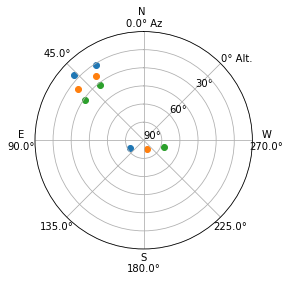

In [48]:
## Finder chart ##

# where the objects are at sunset
sunset = CTO.sun_set_time(now)

# hour after sunset
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

targets = [m27_target, ngc_target, andro_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)